<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kmeans Example**

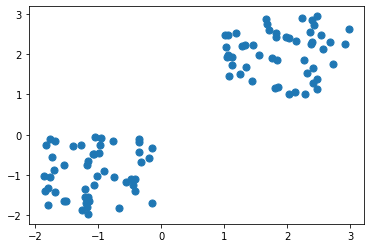

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

---
# **HW2**
---


## **Problem 1 : KMeans Theory**

Given Kmeans Objective discussed in class with Euclidian distance 


Screen Shot 2021-02-03 at 10.50.12 AM.png



---

### **Section A**

prove that E step update on membership ($\pi$) achieves the minimum objective given the current centroids($\mu$) 




Proof By Contradiction:

Claim: 

  E step update on membership ( 𝜋 ) DOES NOT achieve the minimum objective given the current centroids( 𝜇 ). 
  

Proof:

  If E step update on membership ( 𝜋_k ) DOES NOT achieve the minimum objective given the current centroids( 𝜇_k ), then it means that the distance of some data points to 𝜇_k can be reduced by changing the cluster. If we change the cluster of the problematic data points, then we need to reclassify the data points to belong to some cluster ( 𝜋_j ). Since we are given the current centroid ( 𝜇_k) and that does not change, then we have a contradiction in definition, because we cannot measure the distance of data points classified to (𝜋_j) in relation to a centeroid belonging to an another cluster (𝜇_k).
  


---

### **Section B**


prove that M step update on centroids ($\mu$) achieves the minimum objective given the current memberships($\pi$) 



Proof: 

---

### **Section C**

Explain why KMeans has to stop (converge), but not necessarily to the global minimum objective value.





Explaination:

---


## **PROBLEM 2 : KMeans on data**

Using Euclidian distance or dot product similarity (choose one per dataset, you can try other similarity metrics)

A) run KMeans on the MNIST Dataset, try K=10

B) run KMeans on the FASHION Dataset, try K=10

C) run KMeans on the 20NG Dataset, try K=20

---



Import Common libraries

In [19]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

In [20]:
from sklearn.metrics import pairwise_distances_argmin_min 
# This function computes for each row in X, the index of the row of Y which is closest
#
# Returns
#
#   argmin : ndarray
#   Y[argmin[i], :] is the row in Y that is closest to X[i, :].
#
#   distances : ndarray
#   distances[i] is the distance between the i-th row in X and the argmin[i]-th row in Y.

---
Initiate random centoids

In [21]:
# create random centoids given the parameters 
k=0
val_ciel = 0
vector_len = 0

def init_rand_centoids (int: k , val_ciel, vector_len) -> dict :
  centoid_dict = {}
  centoid_tuple  = np.random.randint(255, size = (k,vector_len))
  print (centoid_tuple.shape)
  centoid_lst = list(centoid_tuple)
  for i in range(len(centoid_lst)):
    centoid_dict[i] = centoid_lst[i]
  return centoid_dict

---
E Step - Assign clusters to centoids

In [22]:
centoid_dict = {}
train_data = []
def assign_cluster(csr_matrix: train_data,  dict: centoid_dict) -> [dict, list]:
  centoid_lst = []
  for centoid in centoid_dict.values():
    centoid_lst.append(centoid)
  centoid_nd_array = np.array(centoid_lst)
  cluster_tuple = pairwise_distances_argmin_min(train_data, centoid_nd_array)  
  
  clt = list(cluster_tuple[0])
  dstances =  list(cluster_tuple[1])
  cluster_dict = {}
  for ele in enumerate(clt):
    # print(ele[0])
    if not cluster_dict.get(ele[1]):
      cluster_dict[ele[1]] = []
    cluster_dict.get(ele[1]).append(ele[0])
    # print(cluster_dict[ele[1]])
  return [cluster_dict, dstances]

---
M Step - Get centoids that belong to each cluster

In [23]:
train_data =[]
cluster_dict = {}

def tune_centroid (csr_matrix: train_data, dict: cluster_dict) -> dict:
  centoid_dict = {}
  train_data.shape

  for cluster_key in cluster_dict.keys() :
    train_indices = cluster_dict.get(cluster_key)
    cluster_imgs = []

    for train_index in train_indices:
      cluster_imgs.append(train_data[train_index])
    centoid_dict[cluster_key] = np.sum(cluster_imgs, axis=0) / len(train_indices)

  return centoid_dict

---
### **Section A**

 Run KMeans on the MNIST Dataset, try K=10

In [24]:
from keras.datasets import mnist

# load mnist data
(train_data, train_labels) , (test_images, test_labels)= mnist.load_data()
train_data = np.reshape(train_data, (60000, 784)) 



In [ ]:
k = 5
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(k, 255, 784)

# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)

  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

In [ ]:
k = 10
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(k, 255, 784)

# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)

  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

In [ ]:
k = 20
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(k, 255, 784)

# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)

  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

---
### **Section B**

Run KMeans on the 20NG Dataset, try K=20

In [ ]:
from keras.datasets import fashion_mnist as fashion

# load fashion data
(train_data, train_labels) , (test_images, test_labels)= fashion.load_data()
train_data = np.reshape(train_data, (60000, 784)) 

In [ ]:
# define number of clusters
k = 5
cycles = 200

# define number of clusters
centoid_dict = init_rand_centoids(k, 255, 784)

# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)


  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

In [ ]:
# define number of clusters
k = 10
cycles = 200

# define number of clusters
centoid_dict = init_rand_centoids(k, 255, 784)

# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)


  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

In [ ]:
# define number of clusters
k = 20
cycles = 200

# define number of clusters
centoid_dict = init_rand_centoids(k, 255, 784)

# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)


  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

---
### **Section C**

Run KMeans on the 20NG Dataset, try K=20


Import Training Data and normalize 

In [59]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
train_data = train_set.data
train_label = train_set.target
test_set = fetch_20newsgroups(subset='test')
test_data = test_set.data
test_label = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
train_data = vectorizer.fit_transform(train_data)
train_data = np.array(train_data.todense())
# print(train_data[0].shape) 

# print(train_data.shape)

In [60]:
k = 5
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(k, 100, 130107)

(5, 130107)


In [62]:
# Run E and M steps to converge at local minimum
distances = []
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  distances = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)


  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(distances)
  print ('\n')

centoid_dict :  4   | val : 11314
598722680.7806106


centoid_dict :  0   | val : 11314
11034.762707600019




KeyboardInterrupt: ignored